# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load data
df_tfl = pd.read_csv('/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [4]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [5]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

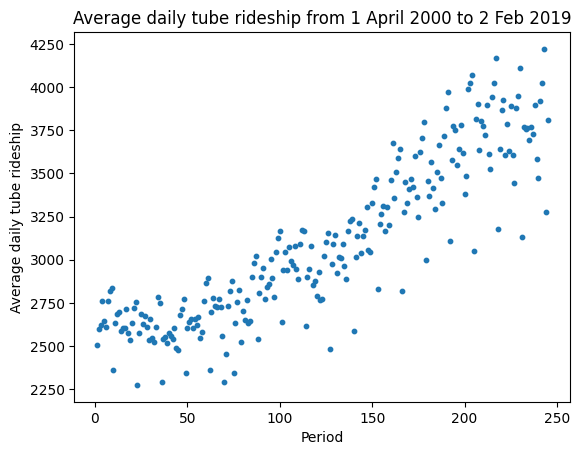

In [6]:
#Your code for scatterplot here

plt.scatter(xvals, yvals, s=10)
plt.xlabel('Period')
plt.ylabel('Average daily tube rideship')
plt.title('Average daily tube rideship from 1 April 2000 to 2 Feb 2019')
plt.show()

## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

The least squares coefficients are:
 beta_0 =  2367.382 	 beta_1 =  5.939


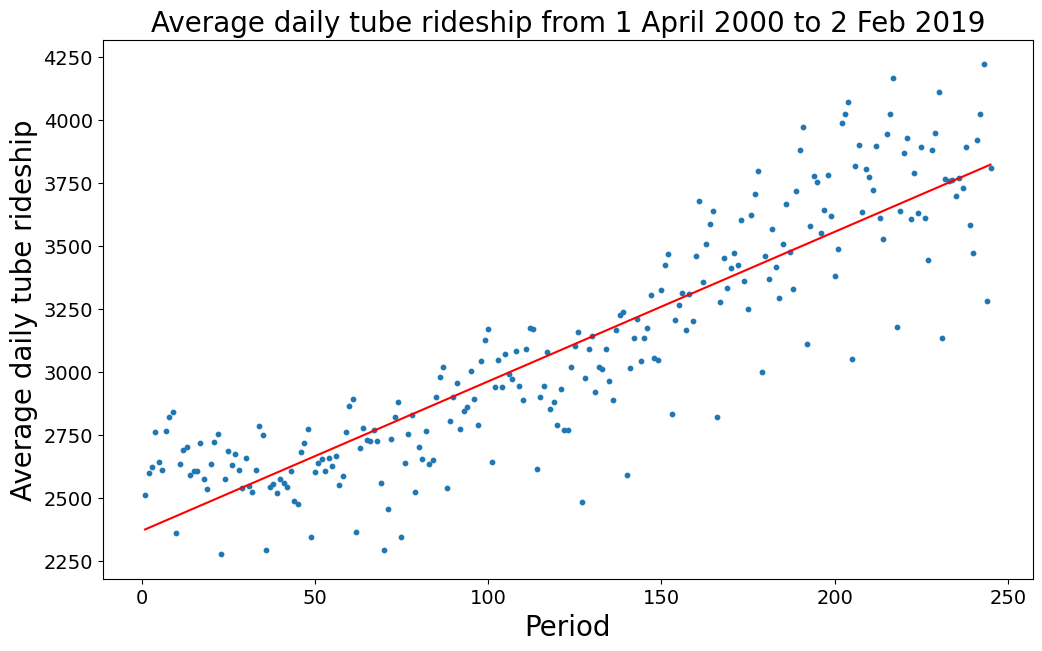

In [7]:
#Your code here

all_ones = np.ones(np.shape(xvals))
X = np.column_stack((all_ones, xvals))
XT= X.T 

beta_lin = np.linalg.inv(XT.dot(X)).dot(XT).dot(yvals) # Calculating the least-squares coefficients
print('The least squares coefficients are:\n beta_0 = ', np.round(beta_lin[0], 3), 
      '\t beta_1 = ', np.round(beta_lin[1], 3))
fit_lin = X.dot(beta_lin)

# to make sure figures are large enough for interpretation
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Scatter plot and linear fit
plt.scatter(xvals, yvals, s=10)
plt.plot(xvals, fit_lin, 'r')
plt.xlabel('Period')
plt.ylabel('Average daily tube rideship')
plt.title('Average daily tube rideship from 1 April 2000 to 2 Feb 2019')
plt.show()

fit_0 = np.mean(yvals)*all_ones 
SSE_0 = np.linalg.norm(yvals - fit_0)**2
MSE_0 = SSE_0/(np.size(yvals))

resid_lin = yvals - fit_lin
SSE_lin = np.linalg.norm(resid_lin)**2
MSE_lin = SSE_lin/np.size(yvals)

print('Mean of residuals', np.round(np.mean(resid_lin),3))
print('Sum of squared errors SSE for linear model is:', np.round(SSE_lin,3))
print('Mean squared error MSE for linear model is:', np.round(MSE_lin,3))
print('R^2 for the first-order linear model = ', np.round(1- SSE_lin/SSE_0, decimals = 4))

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

Mean of residuals 0.0
Sum of squared errors SSE for linear model is: 11104290.801
Mean squared error MSE for linear model is: 45323.636
R^2 for the first-order linear model =  0.7956


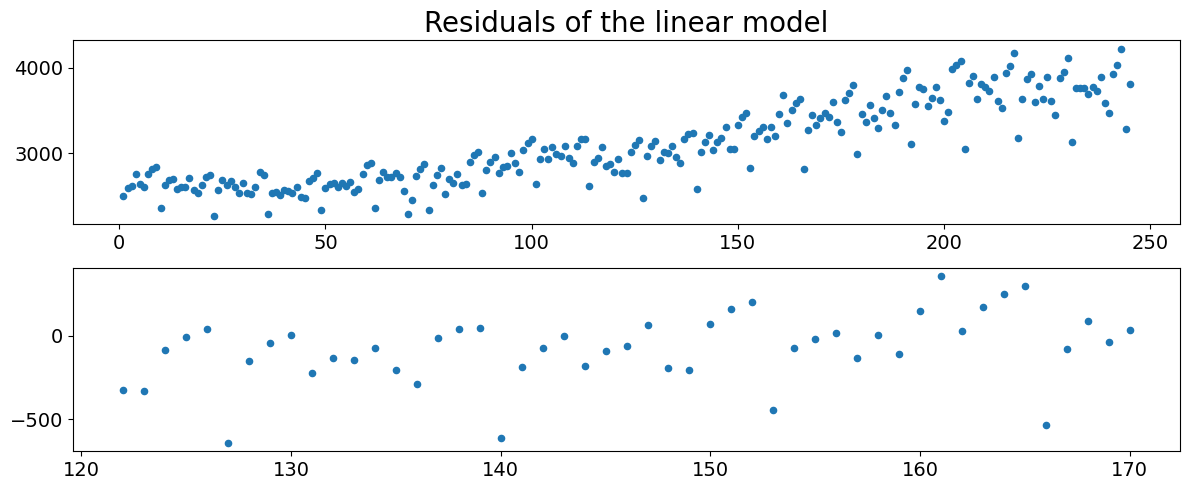

In [8]:
# Your code here

plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(211)
plt.scatter(xvals, yvals, s=20)
plt.title('Residuals of the linear model')
plt.subplot(212)
plt.scatter(xvals[121:170], resid_lin[121:170], s=20) 
plt.tight_layout()
plt.savefig('residuals_transport.pdf', bbox_inches = 'tight')

< Comment on periodic components here >

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


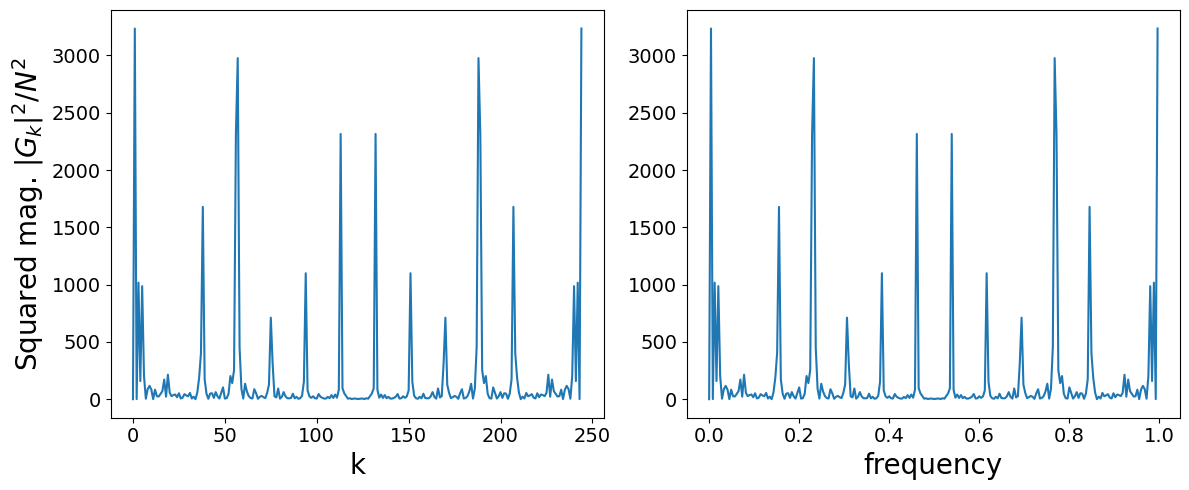

In [9]:
# Your code to compute and plot the histogram

N = np.size(xvals)
T = xvals[101] - xvals[100]  # This can be the time interval between any two successive values.

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(resid_lin, N)/N)**2 # Normalize by N
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency')
plt.savefig('DFT_transport.pdf', bbox_inches = 'tight')
plt.tight_layout()


In [10]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum

top_inds = indices[(pgram > 0.6*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.6*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  56.  57. 113. 132. 188. 189. 244.]  Top frequencies in Hz: [0.00408163 0.22857143 0.23265306 0.46122449 0.53877551 0.76734694
 0.77142857 0.99591837]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

In [24]:
# Your code here

k = len(top_inds)//2
fits_sc = []

for i in range(k):
  w = 2*math.pi*top_inds[i]/(N*T)  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)
  # Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
  XT = np.vstack((np.sin(w*xvals), np.cos(w*xvals)))
  X = np.transpose(XT)

  beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(resid_lin) # Calculating the least-squares coefficients
  print('The coefficients beta_s, beta_c are:', np.round(beta_sc,3))
  
  fit_sc = X.dot(beta_sc)
  if  i==0: fit_sc0 = X.dot(beta_sc)
  elif i==1: fit_sc1 = X.dot(beta_sc)
  elif i==2: fit_sc2 = X.dot(beta_sc)
  elif i==3: fit_sc3 = X.dot(beta_sc)
  resid_sc = yvals - fit_sc
  SSE_sc = 0
  SSE_sc += np.linalg.norm(resid_sc)**2

  fit_0 = np.mean(yvals)*all_ones 
  SSE_0 = np.linalg.norm(yvals - fit_0)**2
  MSE_0 = SSE_0/(np.size(yvals))

MSE_sc = SSE_sc/np.size(yvals)
print('Sum of squared errors SSE for linear model is:', np.round(SSE_lin,3))
print('Mean squared error MSE for linear model is:', np.round(MSE_lin,3))
print('R^2 for the first-order linear model = ', np.round(1- SSE_lin/SSE_0, decimals = 3))

The coefficients beta_s, beta_c are: [-51.253 101.556]
The coefficients beta_s, beta_c are: [-15.581 -94.797]
The coefficients beta_s, beta_c are: [81.659 72.381]
The coefficients beta_s, beta_c are: [32.472 90.589]
Sum of squared errors SSE for linear model is: 11104290.801
Mean squared error MSE for linear model is: 45323.636
R^2 for the first-order linear model =  0.796


## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

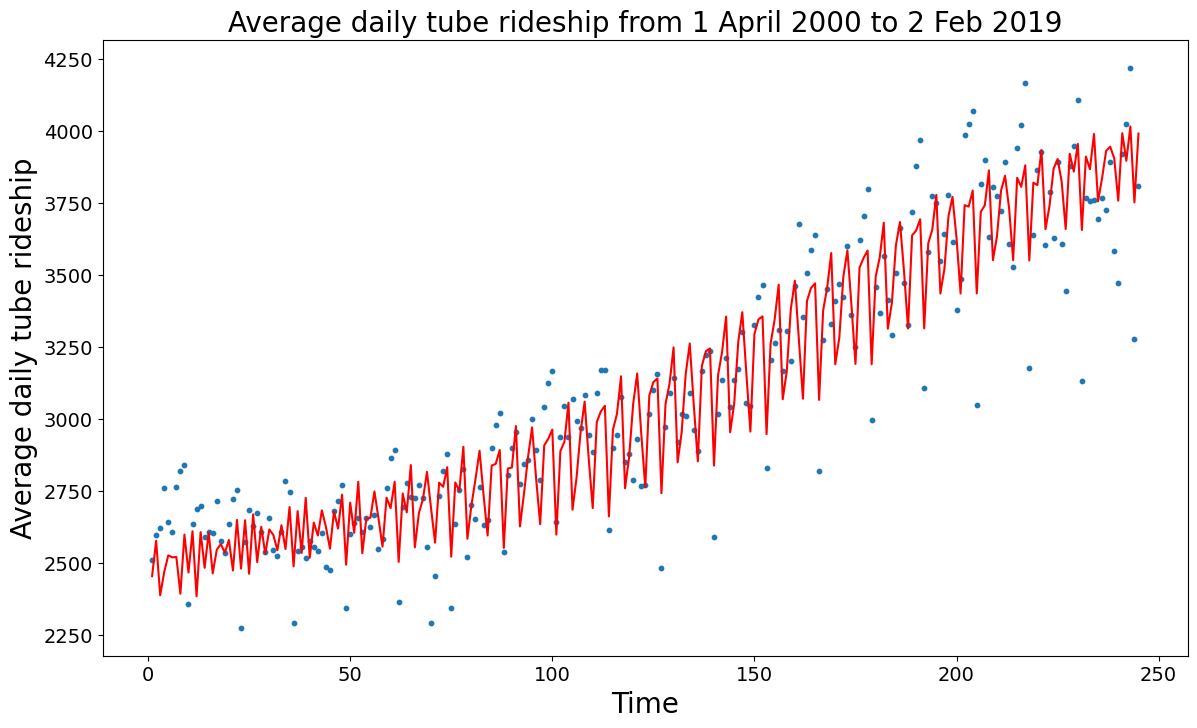

Sum of squared errors for the combined fit =  5795423.244
Mean squared error for the combined fit =  23654.789
R^2 coefficient of combined fit =  0.893


In [27]:
# Your code here

fit_combined = fit_lin + fit_sc0 + fit_sc1 + fit_sc2 + fit_sc3 
#resid_comb = yvalues - fit_combined # This will is the same as resid_final computed above

resid_final = resid_lin - (fit_sc0 + fit_sc1 + fit_sc2 + fit_sc3)
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/np.size(yvals)

plt.rcParams['figure.figsize'] = [14, 8]
plt.scatter(xvals, yvals, s=10)
plt.plot(xvals, fit_combined, 'r')
plt.xlabel('Time')
plt.ylabel('Average daily tube rideship')
plt.title('Average daily tube rideship from 1 April 2000 to 2 Feb 2019')
plt.savefig('transport_combined_fit.pdf', bbox_inches = 'tight')
plt.show()

print('Sum of squared errors for the combined fit = ', np.round(SSE_final,3))
print('Mean squared error for the combined fit = ', np.round(MSE_final,3))

SSE_0 = np.linalg.norm(yvals - np.mean(yvals))**2
R2_combined = 1 - SSE_final/SSE_0
print('R^2 coefficient of combined fit = ', np.round(R2_combined, 3))

SSE and MSE decreased for combined model compared to linear model and R^2 increased.